### Load data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir -p ~/.kaggle

!chmod 600 ~/.kaggle/kaggle.json

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/mushroom-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mushroom-classification


In [4]:
data_path = "/kaggle/input/mushroom-classification/mushrooms.csv"

### explore data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv(data_path)

In [7]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [9]:
df.info()
# no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [10]:
df["class"].value_counts()

,count
class,
e,4208
p,3916


In [11]:
df["class"].value_counts(normalize=True)
# almost even distribution so not data imbalance

,proportion
class,
e,0.517971
p,0.482029


### Data preprocessing

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [17]:
data = df.copy()

data["class"] = data["class"].map({"e": 0, "p": 1})

# all of the rest of the data is categorical
label_encoders = {}
for col in data.columns:
  if data[col].dtype == "object":
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


X = data.drop("class", axis=1)
y = data["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
print(X_train.shape, X_test.shape)

(6499, 22) (1625, 22)


In [20]:
y_train.value_counts(normalize=True)

,proportion
class,
0,0.517926
1,0.482074


### Modeles

In [32]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, confusion_matrix


###### Baseline

In [24]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [26]:
preds = clf.predict(X_test)
print(classification_report(y_test, preds, target_names=["e", "p"]))

              precision    recall  f1-score   support

           e       0.95      0.96      0.96       842
           p       0.96      0.95      0.96       783

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



In [30]:
clf_forest = RandomForestClassifier(max_depth=5, random_state=0)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [31]:
preds = clf_forest.predict(X_test)
print(classification_report(y_test, preds, target_names=["e", "p"]))

              precision    recall  f1-score   support

           e       0.99      1.00      0.99       842
           p       1.00      0.99      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



###### Tunning for high recall (Poisonous Mushrooms)

In [57]:
weights = {0: 1, 1: 5}  # Tune the ratio
clf_weighted = LogisticRegression(class_weight=weights, random_state=0, max_iter=1000)
clf_weighted.fit(X_train, y_train)

probs = clf_weighted.predict_proba(X_test)[:, 1]
custom_preds = (probs >= 0.4).astype(int)

print("Logistic Regression with manual class weights")
print(classification_report(y_test, custom_preds, target_names=["edible", "poisonous"]))
print("Confusion Matrix:")
print(confusion_matrix(y_test, custom_preds))

Logistic Regression with manual class weights
              precision    recall  f1-score   support

      edible       1.00      0.91      0.95       842
   poisonous       0.91      1.00      0.95       783

    accuracy                           0.95      1625
   macro avg       0.96      0.95      0.95      1625
weighted avg       0.96      0.95      0.95      1625

Confusion Matrix:
[[769  73]
 [  3 780]]


In [42]:
threshold = 0.1
custom_preds = (probs >= threshold).astype(int)

print(classification_report(y_test, custom_preds, target_names=["e", "p"]))
print("Confusion Matrix:")
print(confusion_matrix(y_test, custom_preds))

              precision    recall  f1-score   support

           e       0.99      0.75      0.85       842
           p       0.79      0.99      0.88       783

    accuracy                           0.87      1625
   macro avg       0.89      0.87      0.87      1625
weighted avg       0.89      0.87      0.87      1625

Confusion Matrix:
[[633 209]
 [  6 777]]


In [43]:
# Twicking tresholds
probs = clf_forest.predict_proba(X_test)[:, 1] # props for class 1 (poisonous)

precision, recall, thresholds = precision_recall_curve(y_test, probs)

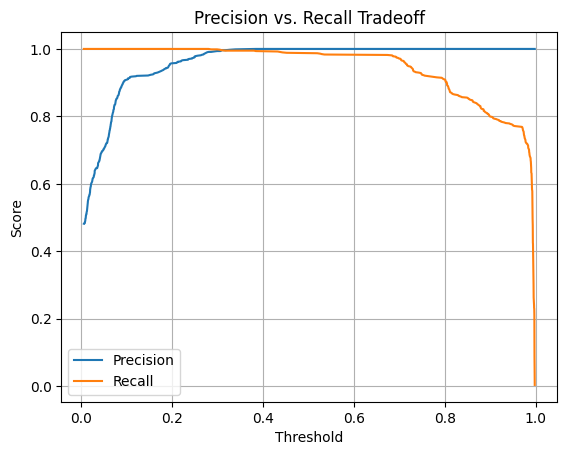

In [44]:
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision vs. Recall Tradeoff")
plt.legend()
plt.grid(True)
plt.show()

In [48]:
threshold = 0.2
custom_preds = (probs >= threshold).astype(int)

print(classification_report(y_test, custom_preds, target_names=["e", "p"]))
print("Confusion Matrix:")
print(confusion_matrix(y_test, custom_preds))

              precision    recall  f1-score   support

           e       1.00      0.96      0.98       842
           p       0.96      1.00      0.98       783

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625

Confusion Matrix:
[[808  34]
 [  0 783]]


In [47]:
confusion_matrix(y_test, custom_preds)

array([[837,   5],
       [  2, 781]])

In [49]:
importances = clf_forest.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_indices = importances.argsort()[::-1]
for idx in sorted_indices:
    print(f"{feature_names[idx]}: {importances[idx]:.4f}")


odor: 0.1417
gill-size: 0.1117
ring-type: 0.0944
spore-print-color: 0.0911
gill-color: 0.0905
population: 0.0706
bruises: 0.0703
gill-spacing: 0.0587
stalk-surface-above-ring: 0.0569
stalk-root: 0.0562
stalk-surface-below-ring: 0.0459
habitat: 0.0280
stalk-color-below-ring: 0.0167
stalk-color-above-ring: 0.0157
stalk-shape: 0.0152
ring-number: 0.0105
cap-surface: 0.0100
cap-color: 0.0090
veil-color: 0.0047
gill-attachment: 0.0013
cap-shape: 0.0011
veil-type: 0.0000


In [58]:
import joblib
joblib.dump(clf_forest, "mushroom_detector_forest.pkl")
joblib.dump(clf_weighted, "mushroom_detector_log.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")


['label_encoders.pkl']

In [61]:
new_df = X_test.copy()
new_df["class"] = y_test

new_df.to_csv("test_data.csv", index=False)